total Atelectasis images:        2015
total Cardiomegaly images:       464
total Consolidation images:      633
total Edema images:              310
total Effusion images:           1804
total Emphysema images:          461
total Fibrosis images:           366
total Hernia images:             53
total Infiltration images:       4640
total Mass images:               1043
total No_Finding images:         28000
total Nodule images:             1273
total Pleural_Thickening images: 525
total Pneumonia images:          161
total Pneumothorax images:       1099


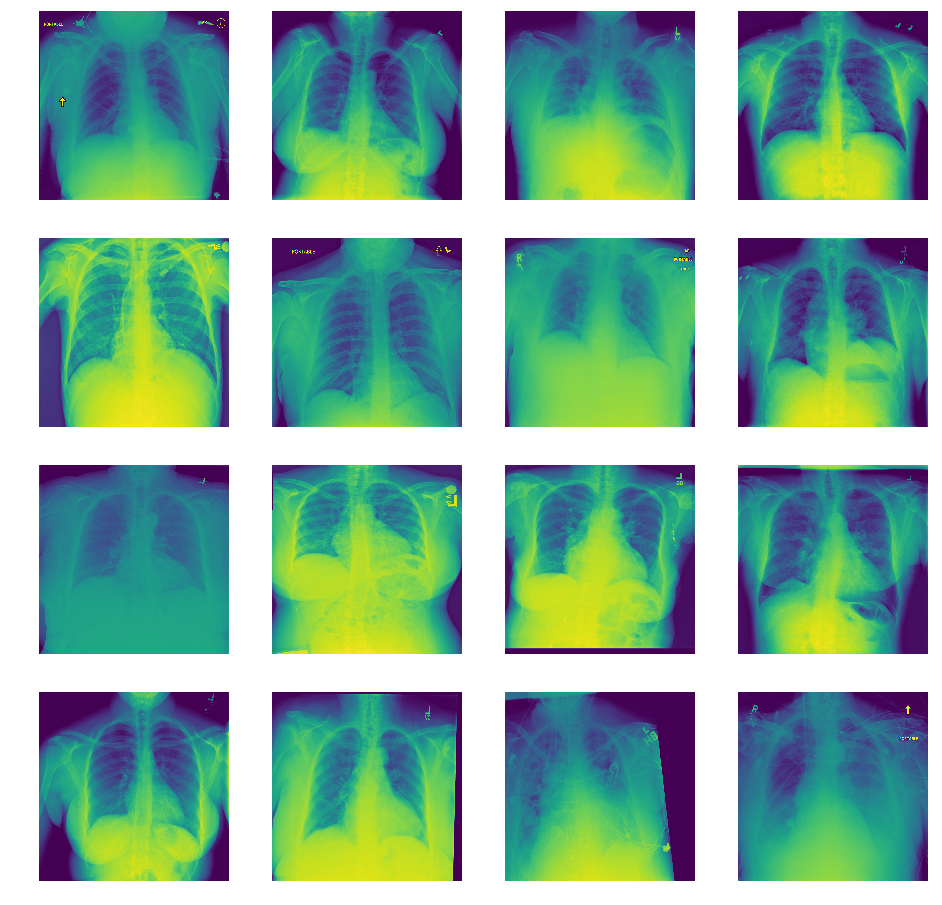

Found 34283 images belonging to 15 classes.
Found 8564 images belonging to 15 classes.
--2019-03-05 22:50:16--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Auflösen des Hostnamens storage.googleapis.com (storage.googleapis.com) … 172.217.21.208, 2a00:1450:4001:818::2010
Verbindungsaufbau zu storage.googleapis.com (storage.googleapis.com)|172.217.21.208|:443 … verbunden.
HTTP-Anforderung gesendet, auf Antwort wird gewartet … 200 OK
Länge: 87910968 (84M) [application/x-hdf]
Wird in »/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5« gespeichert.

/tmp/inception_v3_w 100%[===================>]  83,84M  1,64MB/s    in 59s     

2019-03-05 22:51:16 (1,41 MB/s) - »/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5« gespeichert [87910968/87910968]



In [1]:
#base_dir = '/home/ente/Schreibtisch/2018 - 11 - sorted data'
base_dir = '/media/ente/M2/2018 - 11 - sorted data'
#base_dir = '/Users/mkunzmann/Desktop/2018 - 11 - sorted data'
class_names = ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'No Finding', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax' ]

cutting_layer='mixed7'

#layers
#pooling_window=2
#conv_window=3
#kernel_size=16
dense_units=4092 # Fully Connected Layers > exponentially increases parameter count
dropout= 0.2
activation = "relu"

#preprocessing
color_mode='rgb'
color_channels=3
zoom_range=0.0
validation_split = 0.2
target_width = target_height = 150
target_size = (target_height, target_width)

#optimizer
lr = 0.001
#verbose = 2
batch_size = 10
epochs = 75
import tensorflow as tf
optimizer = tf.keras.optimizers.Adam(lr=lr)
metrics=['categorical_accuracy']
loss='categorical_crossentropy'
class_mode = 'categorical'

#class dirs
import os
ate_dir = os.path.join(base_dir, class_names[0])
car_dir = os.path.join(base_dir, class_names[1])
con_dir = os.path.join(base_dir, class_names[2])
ede_dir = os.path.join(base_dir, class_names[3])
eff_dir = os.path.join(base_dir, class_names[4])
emp_dir = os.path.join(base_dir, class_names[5])
fib_dir = os.path.join(base_dir, class_names[6])
her_dir = os.path.join(base_dir, class_names[7])
inf_dir = os.path.join(base_dir, class_names[8])
mas_dir = os.path.join(base_dir, class_names[9])
nof_dir = os.path.join(base_dir, class_names[10])
nod_dir = os.path.join(base_dir, class_names[11])
ple_dir = os.path.join(base_dir, class_names[12])
pne_dir = os.path.join(base_dir, class_names[13])
pn2_dir = os.path.join(base_dir, class_names[14])
#filenames
ate_fnames = os.listdir(ate_dir)
car_fnames = os.listdir(car_dir)
con_fnames = os.listdir(con_dir)
ede_fnames = os.listdir(ede_dir)
eff_fnames = os.listdir(eff_dir)
emp_fnames = os.listdir(emp_dir)
fib_fnames = os.listdir(fib_dir)
her_fnames = os.listdir(her_dir)
inf_fnames = os.listdir(inf_dir)
mas_fnames = os.listdir(mas_dir)
nof_fnames = os.listdir(nof_dir)
nod_fnames = os.listdir(nod_dir)
ple_fnames = os.listdir(ple_dir)
pne_fnames = os.listdir(pne_dir)
pn2_fnames = os.listdir(pn2_dir)
#print (train_ate_fnames[:10])
#train_car_fnames.sort()

print ('total Atelectasis images:       ', len(os.listdir(ate_dir))) 
print ('total Cardiomegaly images:      ', len(os.listdir(car_dir))) 
print ('total Consolidation images:     ', len(os.listdir(con_dir))) 
print ('total Edema images:             ', len(os.listdir(ede_dir))) 
print ('total Effusion images:          ', len(os.listdir(eff_dir))) 
print ('total Emphysema images:         ', len(os.listdir(emp_dir))) 
print ('total Fibrosis images:          ', len(os.listdir(fib_dir))) 
print ('total Hernia images:            ', len(os.listdir(her_dir))) 
print ('total Infiltration images:      ', len(os.listdir(inf_dir))) 
print ('total Mass images:              ', len(os.listdir(mas_dir))) 
print ('total No_Finding images:        ', len(os.listdir(nof_dir))) 
print ('total Nodule images:            ', len(os.listdir(nod_dir))) 
print ('total Pleural_Thickening images:', len(os.listdir(ple_dir))) 
print ('total Pneumonia images:         ', len(os.listdir(pne_dir))) 
print ('total Pneumothorax images:      ', len(os.listdir(pn2_dir))) 

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4
# Index for iterating over images
pic_index = 0

# Now, display a batch of 8 cat and 8 dog pictures. You can rerun the cell to see a fresh batch each time:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_ate_pix = [os.path.join(ate_dir, fname) 
                for fname in ate_fnames[pic_index-8:pic_index]]
next_car_pix = [os.path.join(car_dir, fname) 
                for fname in car_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_ate_pix+next_car_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)
  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

# All images will be rescaled by 1./255
datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=zoom_range,
    validation_split=validation_split) # set validation split

train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode=class_mode,
    color_mode=color_mode, 
    subset='training') # set as training data

validation_generator = datagen.flow_from_directory(
    base_dir, # same directory as training data
    target_size=target_size,
    batch_size=batch_size,
    class_mode=class_mode, #Determines the type of label arrays that are returned:"categorical" will be 2D one-hot encoded labels,
    color_mode=color_mode, 
    subset='validation') # set as validation data
from tensorflow.keras import layers
from tensorflow.keras import Model

!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
pre_trained_model = InceptionV3(input_shape=(150, 150, 3), include_top=False, weights=None)
pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
  layer.trainable = False

last_layer = pre_trained_model.get_layer(cutting_layer)
#print('last layer output shape:', last_layer.output_shape)
last_output = last_layer.output

#from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(dense_units, activation=activation)(x)
# Add a dropout rate of 0.2
x = layers.Dropout(dropout)(x)
# Add a final softmax layer for classification
x = layers.Dense(len(class_names), activation = 'softmax') (x)

# Configure and compile the model
model = Model(pre_trained_model.input, x)
model.compile(loss=loss,
              #optimizer=RMSprop(lr=0.0001),
              optimizer=optimizer,
              metrics=metrics)

In [2]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
__________________________________________________________________________________________________
conv2d_1 (

In [3]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs = epochs)

Epoch 1/75
3428/3428 [==============================] - 607s 177ms/step - loss: 5.5848 - categorical_accuracy: 0.6533 - val_loss: 5.5792 - val_categorical_accuracy: 0.6539
Epoch 2/75
3428/3428 [==============================] - 598s 175ms/step - loss: 5.5859 - categorical_accuracy: 0.6534 - val_loss: 5.5792 - val_categorical_accuracy: 0.6539
Epoch 3/75
3428/3428 [==============================] - 887s 259ms/step - loss: 5.5893 - categorical_accuracy: 0.6532 - val_loss: 5.5792 - val_categorical_accuracy: 0.6539
Epoch 4/75
3428/3428 [==============================] - 1084s 316ms/step - loss: 5.5849 - categorical_accuracy: 0.6535 - val_loss: 5.5792 - val_categorical_accuracy: 0.6539
Epoch 5/75
3428/3428 [==============================] - 1181s 344ms/step - loss: 5.5874 - categorical_accuracy: 0.6533 - val_loss: 5.5792 - val_categorical_accuracy: 0.6539
Epoch 6/75
3428/3428 [==============================] - 795s 232ms/step - loss: 5.5829 - categorical_accuracy: 0.6536 - val_loss: 5.5792 -

KeyboardInterrupt: 

In [ ]:
from tensorflow.keras.optimizers import SGD

unfreeze = False

# Unfreeze all models after "mixed6"
for layer in pre_trained_model.layers:
  if unfreeze:
    layer.trainable = True
  if layer.name == 'mixed6':
    unfreeze = True

# As an optimizer, here we will use SGD 
# with a very low learning rate (0.00001)
model.compile(loss='binary_crossentropy',
              optimizer=SGD(
                  lr=0.00001, 
                  momentum=0.9),
              metrics=['acc'])

In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs = epochs)

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Retrieve a list of accuracy results on training and test data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and test data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')